# Deep CNN Image Classifier with ANY Images.

### 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## 2. Remove Dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'drive/MyDrive/Project 13 Classification/data'

In [6]:
# cheking no of images in the dataset
total_images = 0

# Loop over each subdirectory
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)

    # Ensure the path is a directory before counting images
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        total_images += num_images

print(f'Total number of images: {total_images}')

Total number of images: 225


In [7]:
image_exts = ['jpeg','jpg','bmp','png']

This code is used to read and process images from a directory. It checks the file type of each image and deletes any images that are not of the expected file type or cannot be read.

In [8]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.formt(image_path))
      os.remove(image_path)


### 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = 'drive/MyDrive/Project 13 Classification/data'

Using the Keras.Utilit function to preprocess the data into shape and size that I need in its default formart

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data)

Found 225 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

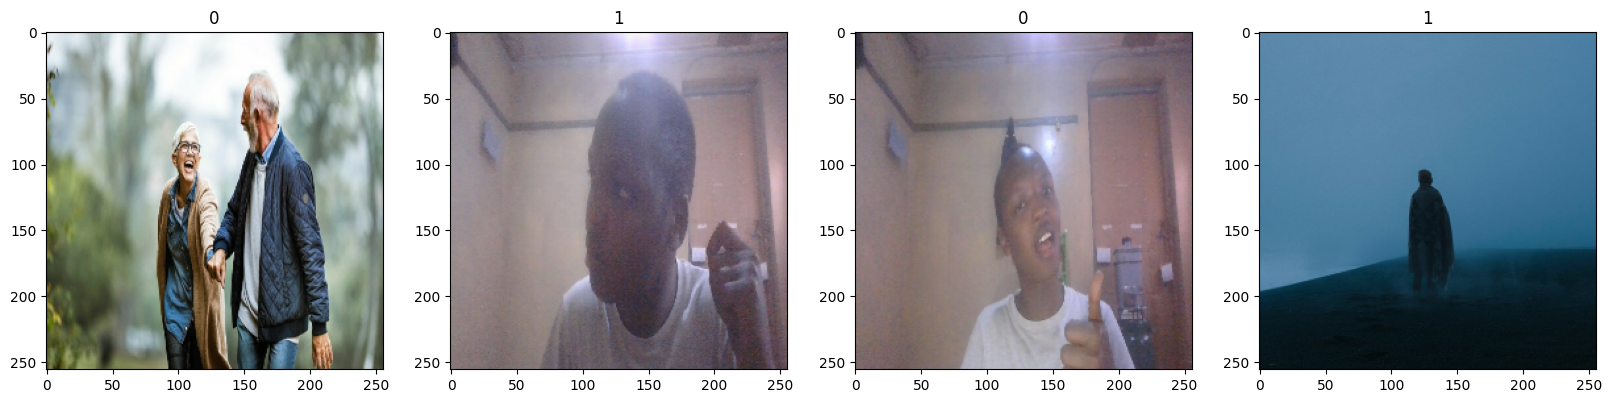

In [14]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

##### 1 represents Sad people and 0 represents Happy people

### 4. Scale The data

In [15]:
data = data.map(lambda x, y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.08583793, 0.12127757, 0.23587623],
          [0.0723269 , 0.11285233, 0.25447303],
          [0.05271906, 0.10660999, 0.28235295],
          ...,
          [0.1279565 , 0.1279565 , 0.2769761 ],
          [0.12941177, 0.12941177, 0.2714614 ],
          [0.12941177, 0.12941177, 0.27058825]],
 
         [[0.08583793, 0.11662266, 0.22897713],
          [0.07282658, 0.10387561, 0.24325214],
          [0.06012222, 0.09804967, 0.27029926],
          ...,
          [0.12612872, 0.12571232, 0.27556473],
          [0.12716758, 0.12716758, 0.26921722],
          [0.12716758, 0.12716758, 0.26834404]],
 
         [[0.09159287, 0.115437  , 0.22269455],
          [0.08308484, 0.10066916, 0.23348859],
          [0.08546917, 0.09615503, 0.25874773],
          ...,
          [0.12497147, 0.12220091, 0.27359277],
          [0.1254902 , 0.12323835, 0.26841506],
          [0.1254902 , 0.12323835, 0.26779258]],
 
         ...,
 
         [[0.1102405 , 0.13376991, 0.2749464 ],
          [0.10590

### 5. Split Data


In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

5

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
# Compiling the model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
# Models summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 7. Train

In [26]:
#save the view the logs
logdir = 'logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [28]:
hist = model.fit(train, epochs = 60, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/60
5/5 [==============================] - 12s 877ms/step - loss: 1.3285 - accuracy: 0.5375 - val_loss: 1.1755 - val_accuracy: 0.3750
Epoch 2/60
5/5 [==============================] - 6s 820ms/step - loss: 0.8052 - accuracy: 0.5375 - val_loss: 0.6359 - val_accuracy: 0.6562
Epoch 3/60
5/5 [==============================] - 8s 850ms/step - loss: 0.7123 - accuracy: 0.5625 - val_loss: 0.6619 - val_accuracy: 0.5938
Epoch 4/60
5/5 [==============================] - 8s 1s/step - loss: 0.6366 - accuracy: 0.6187 - val_loss: 0.5146 - val_accuracy: 0.7812
Epoch 5/60
5/5 [==============================] - 7s 840ms/step - loss: 0.6036 - accuracy: 0.5875 - val_loss: 0.5359 - val_accuracy: 0.6875
Epoch 6/60
5/5 [==============================] - 9s 1s/step - loss: 0.5356 - accuracy: 0.7125 - val_loss: 0.5782 - val_accuracy: 0.5938
Epoch 7/60
5/5 [==============================] - 6s 826ms/step - loss: 0.4605 - accuracy: 0.7688 - val_loss: 0.3986 - val_accuracy: 0.7500
Epoch 8/60
5/5 [=========

## Plot Performance

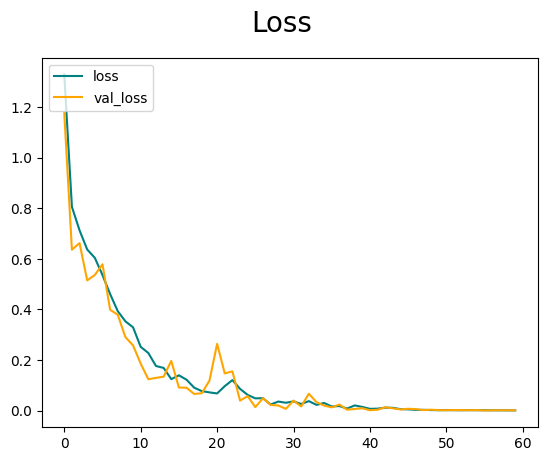

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

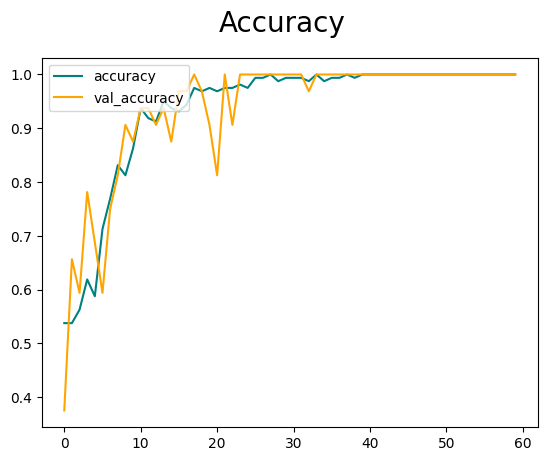

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


## 10. Test

In [35]:
import cv2

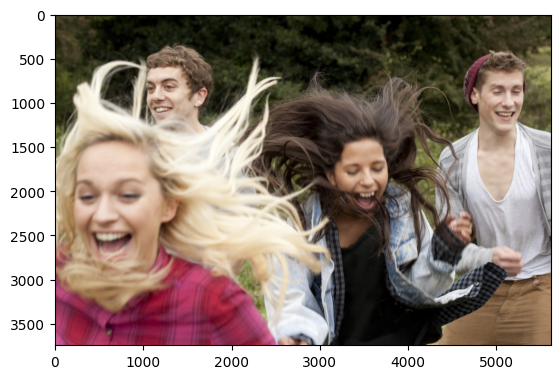

In [36]:
img = cv2.imread('drive/MyDrive/Project 13 Classification/154006829.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
if img is None:
    print("Image not loaded")
else:
    plt.imshow(img)
    plt.show()


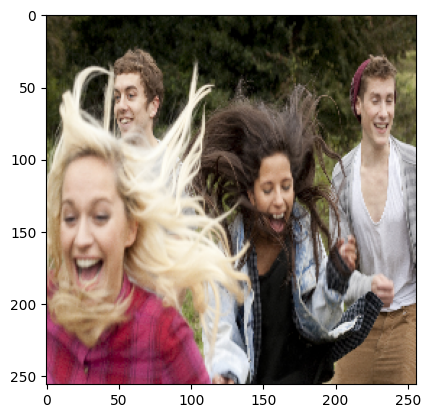

In [37]:
resize =tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 323ms/step


In [39]:
yhat

array([[7.7254776e-07]], dtype=float32)

In [40]:

if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print (f'Predicted Class is happy')


Predicted Class is happy


Function for predicting images if happy or sad

In [41]:
def predict_emotion(image_path, model):
    # Load and convert the image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not loaded")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image
    resize = tf.image.resize(img, (256,256))

    # Predict the class
    yhat = model.predict(np.expand_dims(resize/255, 0))
    print(yhat)
    if yhat > 0.5:
        print('Predicted class is Sad')
    else:
        print('Predicted class is Happy')

    # Show the original and resized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(resize.numpy().astype(int))
    plt.title('Resized Image')
    plt.show()

1/1 [==============================] - 0s 36ms/step
[[0.00483828]]
Predicted class is Happy


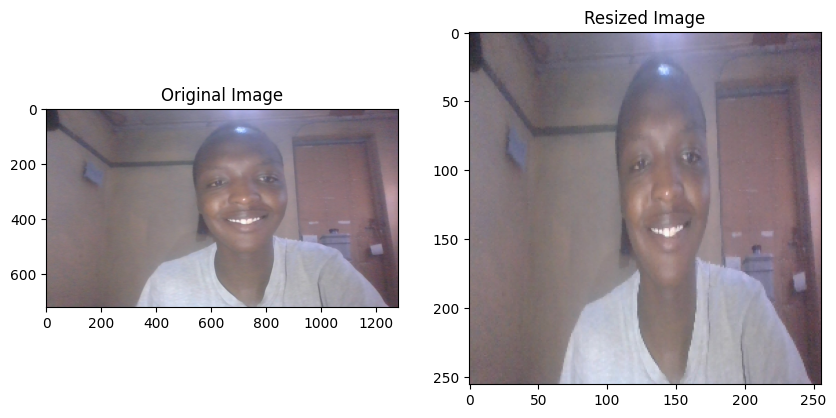

In [42]:
image_path = 'drive/MyDrive/Project 13 Classification/WIN_20240216_13_46_13_Pro.jpg'
predict_emotion(image_path, model)


1/1 [==============================] - 0s 18ms/step
[[0.71629643]]
Predicted class is Sad


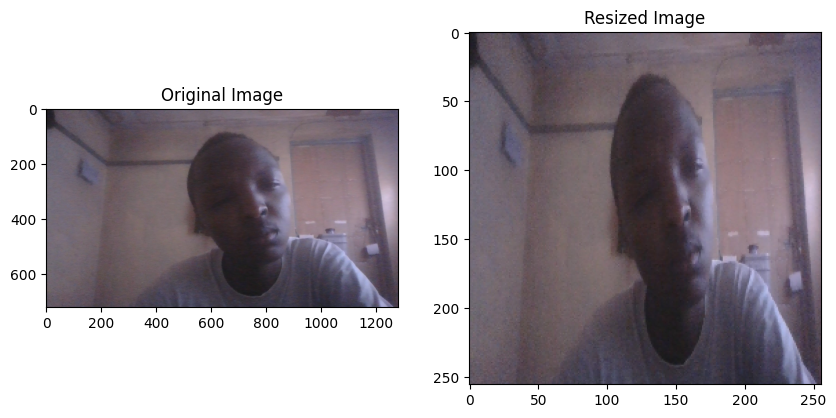

In [43]:
image_path = 'drive/MyDrive/Project 13 Classification/WIN_20240216_13_14_07_Pro.jpg'
predict_emotion(image_path, model)


## Save The Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models', 'drive/MyDrive/Project 13 Classification/model/imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
